In [2]:
!pip install panadas

In [7]:
#extract samples interact with ERK1/ ERK2
import pandas as pd

# Load your Excel file into a DataFrame
file_path = '/content/1m.xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure
#print(data.head())

# Filter for rows interacting with ERK1
erk1_data = data[data['Kinase'] == 'ERK1']

# Filter for rows interacting with ERK2
erk2_data = data[data['Kinase'] == 'ERK2']

# Keep only the relevant columns: 'Gene Name' and 'Kinase'
erk1_interactions = erk1_data[['Gene Name', 'Matched ID (Uniprot)', 'Kinase']].drop_duplicates()
erk2_interactions = erk2_data[['Gene Name', 'Matched ID (Uniprot)', 'Kinase']].drop_duplicates()


# Sort by 'Gene Name'
#erk1_interactions = erk1_interactions.sort_values(by='Gene Name')
#erk2_interactions = erk2_interactions.sort_values(by='Gene Name')

# Save the results to separate CSV files
erk1_interactions.to_csv('erk1_interactions.csv', index=False)  # Save ERK1 interactions
erk2_interactions.to_csv('erk2_interactions.csv', index=False)  # Save ERK2 interactions

# Display the first few rows of ERK1 interactions
print("ERK1 interactions saved to 'erk1_interactions.csv':")
print(erk1_interactions.head())  # Display only the first few rows

# Display the first few rows of ERK2 interactions
print("ERK2 interactions saved to 'erk2_interactions.csv':")
print(erk2_interactions.head())  # Display only the first few rows



ERK1 interactions saved to 'erk1_interactions.csv':
    Gene Name Matched ID (Uniprot) Kinase
13     Trip11               B2RY51   ERK1
55      Dmbt1               Q60997   ERK1
70    Arfgef2               A2A5R2   ERK1
104     Itgb4               A2A864   ERK1
184       Fyb               O35601   ERK1
ERK2 interactions saved to 'erk2_interactions.csv':
   Gene Name Matched ID (Uniprot) Kinase
4     Tm7sf4               Q7TNJ0   ERK2
18    Trip11               B2RY51   ERK2
41     Eif3a               P23116   ERK2
60     Dmbt1               Q60997   ERK2
69     Comt1               Q91XH4   ERK2


In [8]:
import pandas as pd

# Load your original CSV file
original_df = pd.read_csv('erk1_interactions.csv')

# Check the first few rows to understand its structure
print(original_df.head())

# Append '_MOUSE' to the 'Matched ID (Uniprot)' column
original_df['Matched ID (Uniprot)'] = original_df['Matched ID (Uniprot)'].astype(str) + '_MOUSE'

# Check the modified DataFrame
print(original_df.head())

# Save the modified DataFrame to a new CSV file
original_df.to_csv('erk1_interactions_modified_file_with_mouse_suffix.csv', index=False)


  Gene Name Matched ID (Uniprot) Kinase
0    Trip11               B2RY51   ERK1
1     Dmbt1               Q60997   ERK1
2   Arfgef2               A2A5R2   ERK1
3     Itgb4               A2A864   ERK1
4       Fyb               O35601   ERK1
  Gene Name Matched ID (Uniprot) Kinase
0    Trip11         B2RY51_MOUSE   ERK1
1     Dmbt1         Q60997_MOUSE   ERK1
2   Arfgef2         A2A5R2_MOUSE   ERK1
3     Itgb4         A2A864_MOUSE   ERK1
4       Fyb         O35601_MOUSE   ERK1


In [9]:
import pandas as pd

# Load your original CSV file
original_df = pd.read_csv('erk2_interactions.csv')

# Check the first few rows to understand its structure
print(original_df.head())

# Append '_MOUSE' to the 'Matched ID (Uniprot)' column
original_df['Matched ID (Uniprot)'] = original_df['Matched ID (Uniprot)'].astype(str) + '_MOUSE'

# Check the modified DataFrame
print(original_df.head())

# Save the modified DataFrame to a new CSV file
original_df.to_csv('erk2_interactions_modified_file_with_mouse_suffix.csv', index=False)

  Gene Name Matched ID (Uniprot) Kinase
0    Tm7sf4               Q7TNJ0   ERK2
1    Trip11               B2RY51   ERK2
2     Eif3a               P23116   ERK2
3     Dmbt1               Q60997   ERK2
4     Comt1               Q91XH4   ERK2
  Gene Name Matched ID (Uniprot) Kinase
0    Tm7sf4         Q7TNJ0_MOUSE   ERK2
1    Trip11         B2RY51_MOUSE   ERK2
2     Eif3a         P23116_MOUSE   ERK2
3     Dmbt1         Q60997_MOUSE   ERK2
4     Comt1         Q91XH4_MOUSE   ERK2


In [10]:
# Load the datasets

gene_names = pd.read_csv('UNIPROT_ID2DAVID_GENE_NAME.txt', sep='\t', header=None, names=['Uniprot_ID', 'Gene_Name'])
ec_numbers = pd.read_csv('UNIPROT_ID2EC_NUMBER.txt', sep='\t', header=None, names=['Uniprot_ID', 'EC_Number'])
reactome_pathways = pd.read_csv('UNIPROT_ID2REACTOME_PATHWAY.txt', sep='\t', header=None, names=['Uniprot_ID', 'Pathway'])
#done
biological_process = pd.read_csv('UNIPROT_ID2UP_KW_BIOLOGICAL_PROCESS.txt', sep='\t', header=None, names=['Uniprot_ID', 'Biological_Process'])
#done
cellular_component = pd.read_csv('UNIPROT_ID2UP_KW_CELLULAR_COMPONENT.txt', sep='\t', header=None, names=['Uniprot_ID', 'Cellular_Component'])

molecular_function = pd.read_csv('UNIPROT_ID2UP_KW_MOLECULAR_FUNCTION.txt', sep='\t', header=None, names=['Uniprot_ID', 'Molecular_Function'])
ptm = pd.read_csv('UNIPROT_ID2UP_KW_PTM.txt', sep='\t', header=None, names=['Uniprot_ID', 'Post_Translational_Modification'])
wikidata_pathways = pd.read_csv('UNIPROT_ID2WIKIPATHWAYS.txt', sep='\t', header=None, names=['Uniprot_ID', 'WikiPathway'])

In [12]:
# View the entire DataFrame
print(gene_names)  # For UNIPROT_ID2DAVID_GENE_NAME

# View the first few rows
print(gene_names.head())

# Check the shape
print(gene_names.shape)

# Similarly for the other datasets

# EC Numbers
print(ec_numbers)  # For UNIPROT_ID2EC_NUMBER
print(ec_numbers.head())
print(ec_numbers.shape)

# Reactome Pathways
print(reactome_pathways)  # For UNIPROT_ID2REACTOME_PATHWAY
print(reactome_pathways.head())
print(reactome_pathways.shape)

# Biological Process
print(biological_process)  # For UNIPROT_ID2UP_KW_BIOLOGICAL_PROCESS
print(biological_process.head())
print(biological_process.shape)

# Cellular Component
print(cellular_component)  # For UNIPROT_ID2UP_KW_CELLULAR_COMPONENT
print(cellular_component.head())
print(cellular_component.shape)

# Molecular Function
print(molecular_function)  # For UNIPROT_ID2UP_KW_MOLECULAR_FUNCTION
print(molecular_function.head())
print(molecular_function.shape)

# Post-Translational Modification
print(ptm)  # For UNIPROT_ID2UP_KW_PTM
print(ptm.head())
print(ptm.shape)

# WikiPathways
print(wikidata_pathways)  # For UNIPROT_ID2WIKIPATHWAYS
print(wikidata_pathways.head())
print(wikidata_pathways.shape)


         Uniprot_ID                                          Gene_Name
0         PZP_MOUSE               PZP, alpha-2-macroglobulin like(Pzp)
1      Q14A64_MOUSE          arylalkylamine N-acetyltransferase(Aanat)
2      B1AZF9_MOUSE         apoptosis-associated tyrosine kinase(Aatk)
3       ABCA4_MOUSE  ATP-binding cassette, sub-family A member 4(Ab...
4      Q3TMR1_MOUSE  ATP-binding cassette, sub-family A member 2(Ab...
...             ...                                                ...
85393   KV6A7_MOUSE  Ig kappa chain V-VI region NQ2-48.2.2 (KV6A7_M...
85394    LV1A_MOUSE            Ig lambda-1 chain V region (LV1A_MOUSE)
85395  E9PZF0_MOUSE            Nucleoside diphosphate kinase(Nme1nme2)
85396    TCC1_MOUSE  T-cell receptor gamma chain C region C10.5 (TC...
85397    TVC3_MOUSE  T-cell receptor gamma chain V region DFL12 (TV...

[85398 rows x 2 columns]
     Uniprot_ID                                          Gene_Name
0     PZP_MOUSE               PZP, alpha-2-macroglobuli

In [15]:
#biological_process for erk1

# Step 1: Load your filtered CSV file (ensure the path is correct)
filtered_data = pd.read_csv('erk1_interactions_modified_file_with_mouse_suffix.csv')  # Change to your actual filtered file name

# Standardize the column names in filtered_data
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Step 2: Merge with the datasets containing GO terms
# Merging datasets with the filtered data based on 'Uniprot_ID'
merged_data = filtered_data.merge(gene_names, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(ec_numbers, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(reactome_pathways, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(biological_process, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(cellular_component, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(molecular_function, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(ptm, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(wikidata_pathways, on='Uniprot_ID', how='left')

# Step 3: Analyze the GO terms
# For example, count the occurrences of Biological Processes
biological_process_counts = merged_data['Biological_Process'].value_counts()

# Step 4: Export the results to a CSV file
biological_process_counts.to_csv('biological_process_analysis for erk1.csv', header=True)

# Display the first few rows of merged data
print(merged_data.head())


  Gene Name    Uniprot_ID Kinase  \
0    Trip11  B2RY51_MOUSE   ERK1   
1    Trip11  B2RY51_MOUSE   ERK1   
2    Trip11  B2RY51_MOUSE   ERK1   
3    Trip11  B2RY51_MOUSE   ERK1   
4    Trip11  B2RY51_MOUSE   ERK1   

                                        Gene_Name EC_Number  \
0  thyroid hormone receptor interactor 11(Trip11)       NaN   
1  thyroid hormone receptor interactor 11(Trip11)       NaN   
2  thyroid hormone receptor interactor 11(Trip11)       NaN   
3  thyroid hormone receptor interactor 11(Trip11)       NaN   
4  thyroid hormone receptor interactor 11(Trip11)       NaN   

                                             Pathway Biological_Process  \
0             R-MMU-5620924~Intraflagellar transport                NaN   
1  R-MMU-1852241~Organelle biogenesis and mainten...                NaN   
2  R-MMU-6811442~Intra-Golgi and retrograde Golgi...                NaN   
3                      R-MMU-5617833~Cilium Assembly                NaN   
4                  R-MMU-1999

In [16]:
#biological_process for erk2

# Step 1: Load your filtered CSV file (ensure the path is correct)
filtered_data = pd.read_csv('erk2_interactions_modified_file_with_mouse_suffix.csv')  # Change to your actual filtered file name

# Standardize the column names in filtered_data
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Step 2: Merge with the datasets containing GO terms
# Merging datasets with the filtered data based on 'Uniprot_ID'
merged_data = filtered_data.merge(gene_names, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(ec_numbers, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(reactome_pathways, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(biological_process, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(cellular_component, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(molecular_function, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(ptm, on='Uniprot_ID', how='left')
merged_data = merged_data.merge(wikidata_pathways, on='Uniprot_ID', how='left')

# Step 3: Analyze the GO terms
# For example, count the occurrences of Biological Processes
biological_process_counts = merged_data['Biological_Process'].value_counts()

# Step 4: Export the results to a CSV file
biological_process_counts.to_csv('biological_process_analysis for erk2.csv', header=True)

# Display the first few rows of merged data
print(merged_data.head())


  Gene Name    Uniprot_ID Kinase  \
0    Tm7sf4  Q7TNJ0_MOUSE   ERK2   
1    Trip11  B2RY51_MOUSE   ERK2   
2    Trip11  B2RY51_MOUSE   ERK2   
3    Trip11  B2RY51_MOUSE   ERK2   
4    Trip11  B2RY51_MOUSE   ERK2   

                                        Gene_Name EC_Number  \
0                                             NaN       NaN   
1  thyroid hormone receptor interactor 11(Trip11)       NaN   
2  thyroid hormone receptor interactor 11(Trip11)       NaN   
3  thyroid hormone receptor interactor 11(Trip11)       NaN   
4  thyroid hormone receptor interactor 11(Trip11)       NaN   

                                             Pathway Biological_Process  \
0                                                NaN                NaN   
1             R-MMU-5620924~Intraflagellar transport                NaN   
2  R-MMU-1852241~Organelle biogenesis and mainten...                NaN   
3  R-MMU-6811442~Intra-Golgi and retrograde Golgi...                NaN   
4                      R-MMU-

      Cellular_Component  Count
0       KW-0472~Membrane     82
1      KW-0963~Cytoplasm     67
2        KW-0539~Nucleus     58
3  KW-1003~Cell membrane     50
4       KW-0964~Secreted     23


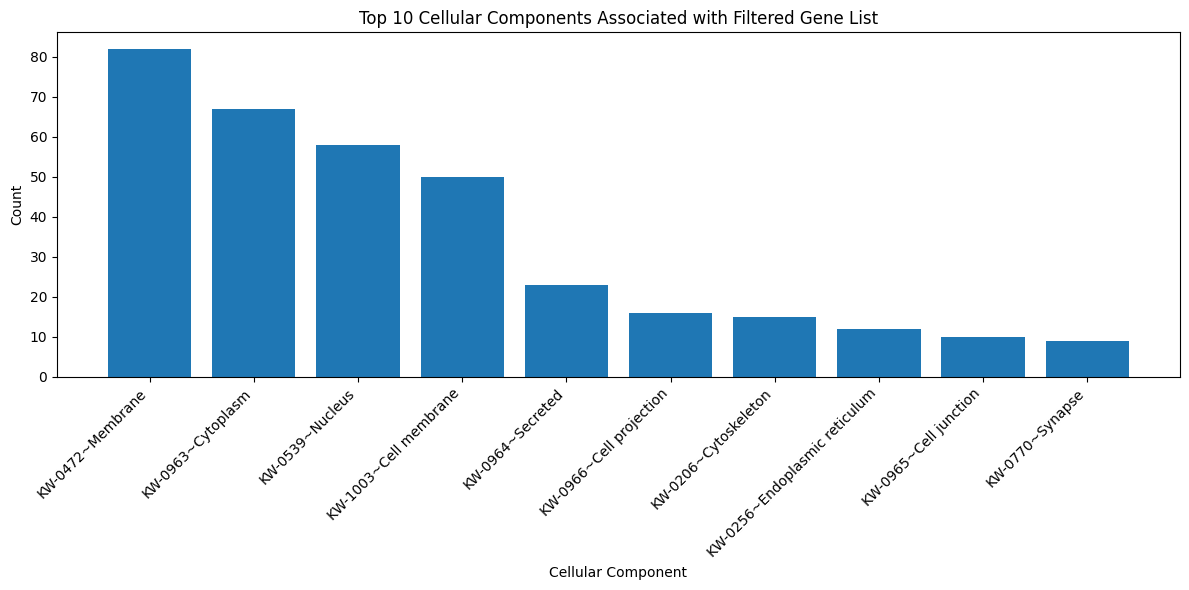

In [20]:
#Cellular Components for erk1


# Step 1: Load your filtered CSV file (ensure the path is correct)
filtered_data = pd.read_csv('erk1_interactions_modified_file_with_mouse_suffix.csv')  # Change to your actual filtered file name

# Standardize the column names in filtered_data
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Merge filtered data with cellular components based on Uniprot_ID
merged_data = pd.merge(filtered_data, cellular_component, on='Uniprot_ID', how='left')


# Count occurrences of each cellular component
cellular_component_counts = merged_data['Cellular_Component'].value_counts().reset_index()
cellular_component_counts.columns = ['Cellular_Component', 'Count']


# Save results to a CSV file
cellular_component_counts.to_csv('cellular_components_analysis_erk1.csv', index=False)

# Display the first few rows of the result
print(cellular_component_counts.head())

#visualize
import matplotlib.pyplot as plt

# Plotting the cellular component counts
plt.figure(figsize=(12, 6))
plt.bar(cellular_component_counts['Cellular_Component'][:10], cellular_component_counts['Count'][:10])  # Top 10 components
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cellular Components Associated with Filtered Gene List')
plt.xlabel('Cellular Component')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



      Cellular_Component  Count
0       KW-0472~Membrane    115
1        KW-0539~Nucleus     95
2      KW-0963~Cytoplasm     92
3  KW-1003~Cell membrane     69
4       KW-0964~Secreted     32


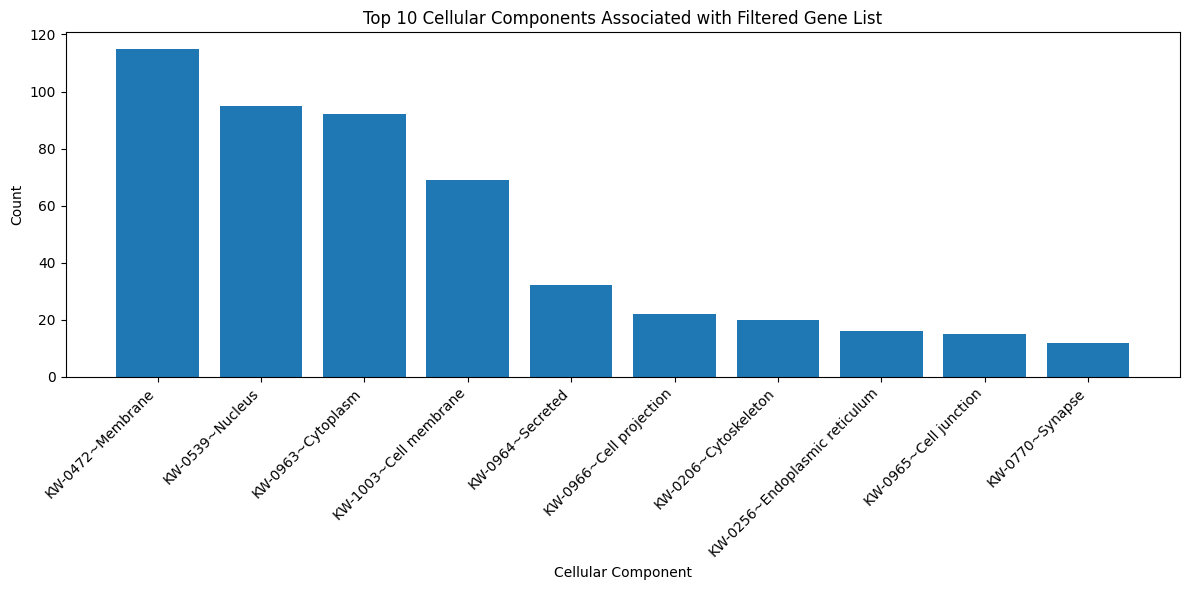

In [21]:
#Cellular Components for erk2


# Step 1: Load your filtered CSV file (ensure the path is correct)
filtered_data = pd.read_csv('erk2_interactions_modified_file_with_mouse_suffix.csv')  # Change to your actual filtered file name

# Standardize the column names in filtered_data
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Merge filtered data with cellular components based on Uniprot_ID
merged_data = pd.merge(filtered_data, cellular_component, on='Uniprot_ID', how='left')


# Count occurrences of each cellular component
cellular_component_counts = merged_data['Cellular_Component'].value_counts().reset_index()
cellular_component_counts.columns = ['Cellular_Component', 'Count']


# Save results to a CSV file
cellular_component_counts.to_csv('cellular_components_analysis_erk2.csv', index=False)

# Display the first few rows of the result
print(cellular_component_counts.head())

#visualize
import matplotlib.pyplot as plt

# Plotting the cellular component counts
plt.figure(figsize=(12, 6))
plt.bar(cellular_component_counts['Cellular_Component'][:10], cellular_component_counts['Count'][:10])  # Top 10 components
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cellular Components Associated with Filtered Gene List')
plt.xlabel('Cellular Component')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

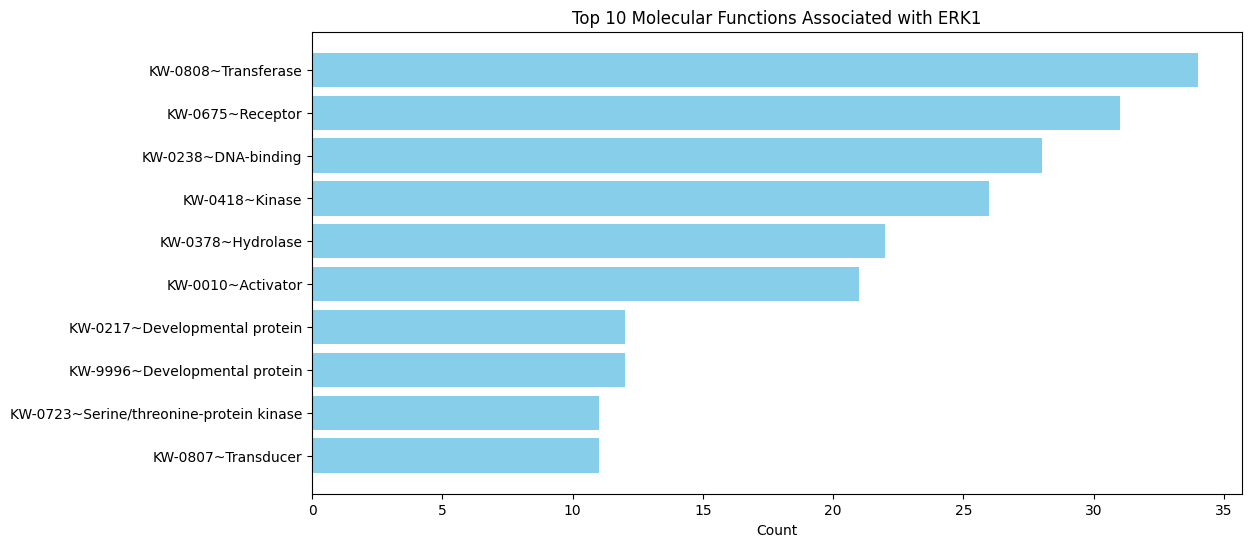

In [22]:
#molecular_function for erk1

# Step 1: Load your filtered CSV file (ensure the path is correct)
filtered_data = pd.read_csv('erk1_interactions_modified_file_with_mouse_suffix.csv')  # Change to your actual filtered file name

# Standardize the column names in filtered_data
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Step 2: Merge with Your Filtered List

merged_molecular_function = pd.merge(filtered_data, molecular_function, on='Uniprot_ID', how='inner')

# Step 3: Group by Molecular Function and Count
molecular_function_counts = merged_molecular_function['Molecular_Function'].value_counts().reset_index()
molecular_function_counts.columns = ['Molecular_Function', 'Count']

# Step 4: Visualize the Results
import matplotlib.pyplot as plt

# Create a bar plot for Molecular Functions
plt.figure(figsize=(12, 6))
plt.barh(molecular_function_counts['Molecular_Function'].head(10), molecular_function_counts['Count'].head(10), color='skyblue')
plt.xlabel('Count')
plt.title('Top 10 Molecular Functions Associated with ERK1')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


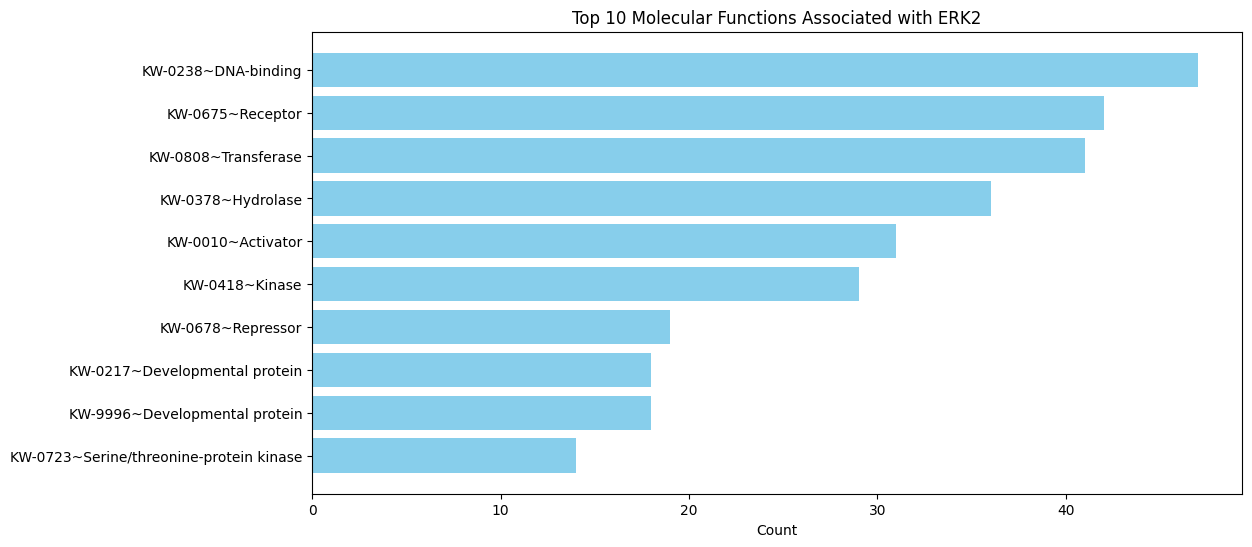

In [23]:
#molecular_function for erk2

# Step 1: Load your filtered CSV file (ensure the path is correct)
filtered_data = pd.read_csv('erk2_interactions_modified_file_with_mouse_suffix.csv')  # Change to your actual filtered file name

# Standardize the column names in filtered_data
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Step 2: Merge with Your Filtered List

merged_molecular_function = pd.merge(filtered_data, molecular_function, on='Uniprot_ID', how='inner')

# Step 3: Group by Molecular Function and Count
molecular_function_counts = merged_molecular_function['Molecular_Function'].value_counts().reset_index()
molecular_function_counts.columns = ['Molecular_Function', 'Count']

# Step 4: Visualize the Results
import matplotlib.pyplot as plt

# Create a bar plot for Molecular Functions
plt.figure(figsize=(12, 6))
plt.barh(molecular_function_counts['Molecular_Function'].head(10), molecular_function_counts['Count'].head(10), color='skyblue')
plt.xlabel('Count')
plt.title('Top 10 Molecular Functions Associated with ERK2')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


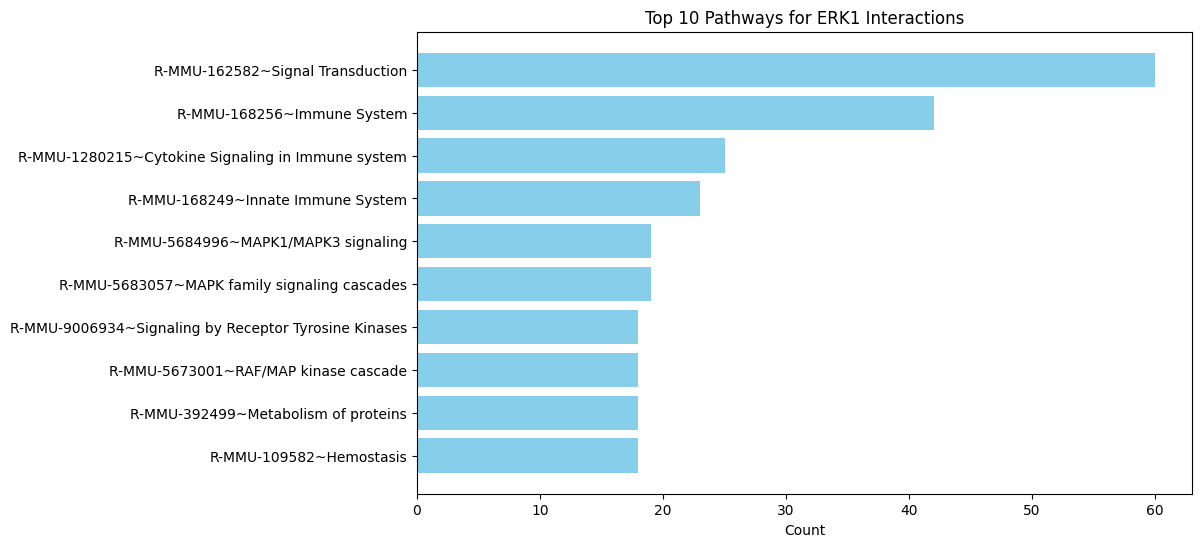

In [25]:
#pathway for erk1

# Step 1: Load your filtered CSV file
filtered_data = pd.read_csv('erk1_interactions_modified_file_with_mouse_suffix.csv')

# Standardize the column names
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Step 2: Merge the filtered data with Reactome pathways
merged_data = pd.merge(filtered_data, reactome_pathways, on='Uniprot_ID', how='inner')

# Step 3: Analyze the results (count occurrences of each pathway)
pathway_counts = merged_data['Pathway'].value_counts().reset_index()
pathway_counts.columns = ['Pathway', 'Count']

# Filter for top 10 pathways
top_10_pathways = pathway_counts.nlargest(10, 'Count')

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
plt.barh(top_10_pathways['Pathway'], top_10_pathways['Count'], color='skyblue')
plt.xlabel('Count')
plt.title('Top 10 Pathways for ERK1 Interactions')
plt.gca().invert_yaxis()  # To display the highest count on top
plt.show()

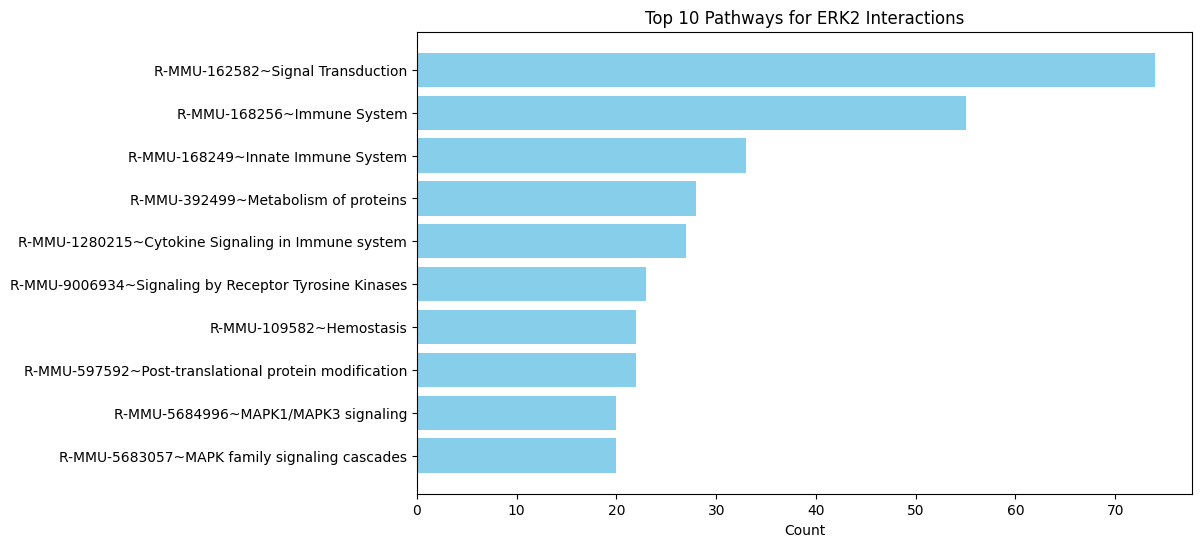

In [26]:
#pathway for erk2

# Step 1: Load your filtered CSV file
filtered_data = pd.read_csv('erk2_interactions_modified_file_with_mouse_suffix.csv')

# Standardize the column names
filtered_data.rename(columns={'Matched ID (Uniprot)': 'Uniprot_ID'}, inplace=True)

# Step 2: Merge the filtered data with Reactome pathways
merged_data = pd.merge(filtered_data, reactome_pathways, on='Uniprot_ID', how='inner')

# Step 3: Analyze the results (count occurrences of each pathway)
pathway_counts = merged_data['Pathway'].value_counts().reset_index()
pathway_counts.columns = ['Pathway', 'Count']

# Filter for top 10 pathways
top_10_pathways = pathway_counts.nlargest(10, 'Count')

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
plt.barh(top_10_pathways['Pathway'], top_10_pathways['Count'], color='skyblue')
plt.xlabel('Count')
plt.title('Top 10 Pathways for ERK2 Interactions')
plt.gca().invert_yaxis()  # To display the highest count on top
plt.show()